<a href="https://colab.research.google.com/github/somoon0422/ML_project_2-/blob/model_code/v2_1ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이상치 제거 버전

# 1. 데이터 불러오기

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [70]:
padua = pd.read_csv('../data/kideny_PADUA_upload.csv')
renal = pd.read_csv('../data/kideny_RENAL_upload.csv')
treat = pd.read_csv('../data/kidney_treat_upload.csv')

# 2. 데이터 정리
- V1 동일 내용 생략

In [71]:
# padua_data, renal_data 데이터 merge
merged_data = pd.merge(padua, renal, on='serial')
# padua 에서 중복 컬럼 삭제
merged_data = merged_data.drop(['Tumor_PADUA', 'Exophytic_PADUA'], axis=1)
# treat 데이터 merge
merged_result = pd.merge(merged_data, treat, on='serial', how='left')
# serial을 인덱스로 설정
merged_result.set_index('serial', inplace=True)

In [72]:
merged_result = merged_result.rename(columns={'Radius_RENAL': 'T_size', 'Exophytic_RENAL':'T_exophytic',
                            'Rim_PADUA':'T_surface_loc','Polarlocation_PADUA':'T_height_loc',
                            'Collectingsystem_PADUA':'T_GM_over','Sinus_PADUA':'T_Sinus_dt',
                            'Nearness_RENAL':'T_near_Ureter','APX_RENAL':'T_APX','Location_RENAL':'T_rel_Ureter','RAIV_1': 'RAIV'
                            })

In [73]:
merged_result = merged_result.dropna()

In [74]:
merged_result['Total'] = merged_result[['PADUA_total', 'RENAL_total']].sum(axis=1)
merged_result.drop(columns=['PADUA_total', 'RENAL_total'], inplace=True)

In [75]:
merged_result['T_size_exo'] = merged_result['T_size'] + merged_result['T_exophytic']

In [76]:
merged_result = merged_result[['T_surface_loc', 'T_Sinus_dt', 'T_height_loc', 'T_GM_over', 'T_size', 'T_exophytic', 'T_near_Ureter', 'T_rel_Ureter', 'T_APX', 'Total', 'T_size_exo', 'RAIV']]

In [77]:
merged_result = merged_result.dropna()

In [78]:
merged_result

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo,RAIV
serial,,,,,,,,,,,,
1,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,12,3.0,51.1
2,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,13,3.0,46.1
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,10,2.0,14.8
4,1.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,13,2.0,19.7
5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,21.3
409,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,30.5
410,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,11,3.0,70.7


In [79]:
merged_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1 to 412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  389 non-null    float64
 1   T_Sinus_dt     389 non-null    float64
 2   T_height_loc   389 non-null    float64
 3   T_GM_over      389 non-null    float64
 4   T_size         389 non-null    float64
 5   T_exophytic    389 non-null    float64
 6   T_near_Ureter  389 non-null    float64
 7   T_rel_Ureter   389 non-null    float64
 8   T_APX          389 non-null    float64
 9   Total          389 non-null    int64  
 10  T_size_exo     389 non-null    float64
 11  RAIV           389 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 39.5 KB


# 3. 데이터 탐색(EDA)
- V1버전 동일 내용 생략

---

## 이상치제거O : merged_data_80이라는 변수를 제거한 merged_drop 을 사용하세요 (아래에 생성해둠) (v2버전)


RAIV가 80이상인 데이터 따로 변수에 할당해줌

In [80]:
merged_data_80 = merged_result[merged_result['RAIV'] > 80]
merged_data_80

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo,RAIV
serial,,,,,,,,,,,,
11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,10,2.0,95.7
16,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,14,3.0,85.4
19,2.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,15,4.0,114.0
22,1.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,16,4.0,154.8
46,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,11,3.0,94.2
50,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,13,4.0,111.3
53,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,14,4.0,103.6
60,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,14,4.0,143.4
79,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,14,3.0,93.6


RAIV80이상인 데이터없는 데이터 새로 만들어줌
(merged_data는 살려둠)

In [81]:
result_copy = merged_result.copy()

## 2. v2 데이터 (이상치제거O)

In [82]:
#이상치 제거버전
merged_drop = merged_result.drop(merged_data_80.index)
merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  371 non-null    float64
 1   T_Sinus_dt     371 non-null    float64
 2   T_height_loc   371 non-null    float64
 3   T_GM_over      371 non-null    float64
 4   T_size         371 non-null    float64
 5   T_exophytic    371 non-null    float64
 6   T_near_Ureter  371 non-null    float64
 7   T_rel_Ureter   371 non-null    float64
 8   T_APX          371 non-null    float64
 9   Total          371 non-null    int64  
 10  T_size_exo     371 non-null    float64
 11  RAIV           371 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 37.7 KB


# 04. 데이터 나누기(train_test_split)

In [83]:
from sklearn.model_selection import train_test_split

X = merged_drop.drop(['RAIV'], axis=1)  # 'RAIV_1' 열을 제외한 모든 열 선택
y = merged_drop['RAIV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## 실루엣계수로 최적 군집 개수 확인

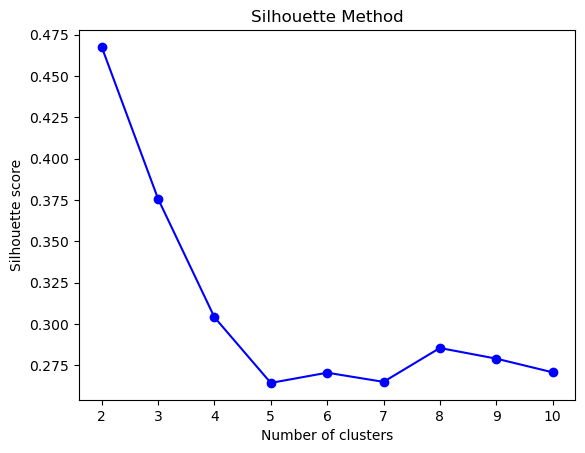

In [84]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 군집수에 따른 실루엣계수를 담을 리스트
silhouette_scores = []

# 2~10까지 군집수를 변화시키며 실루엣계수를 계산
for n_clusters in range(2, 11):
    # KMeans 군집화 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=13)
    kmeans.fit(X_train)

    # 실루엣계수 계산
    silhouette_score_ = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

# 군집수에 따른 실루엣계수 그래프 그리기
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

실루엣 점수가 가장 높은 2개가 최적의 군집 수로 판단

## X_train 데이터로 군집 0 과 1로 나눔 (이상치 제거O)

In [85]:
# 군집화 수행
kmeans = KMeans(n_clusters=2, random_state=13)
kmeans.fit(X_train)

# 군집 레이블 생성
labels = kmeans.labels_

# 군집 0과 1로 나누기
mer_cluster_0 = X_train[labels == 0]
mer_cluster_1 = X_train[labels == 1]

# 군집 0과 1 출력
print("\nmer_cluster_0:")
print(mer_cluster_0.head())
print("\nmer_cluster_1:")
print(mer_cluster_1.head())



mer_cluster_0:
        T_surface_loc  T_Sinus_dt  T_height_loc  T_GM_over  T_size  \
serial                                                               
55                2.0         1.0           2.0        1.0     1.0   
266               1.0         1.0           2.0        1.0     1.0   
119               2.0         1.0           1.0        1.0     1.0   
381               1.0         1.0           1.0        1.0     1.0   
40                2.0         1.0           1.0        1.0     1.0   

        T_exophytic  T_near_Ureter  T_rel_Ureter  T_APX  Total  T_size_exo  
serial                                                                      
55              2.0            1.0           3.0    1.0     13         3.0  
266             2.0            1.0           2.0    1.0     12         3.0  
119             1.0            1.0           1.0    1.0     10         2.0  
381             2.0            2.0           1.0    1.0     12         3.0  
40              2.0            

### 군집0 과 군집1의 모든 변수들의 분포도를 2차원데이터로 시각화

In [86]:
# Create a list of variable names
variable_names = ['T_surface_loc', 'T_Sinus_dt', 'T_height_loc', 'T_GM_over', 'T_size', 'T_exophytic', 'T_near_Ureter', 'T_rel_Ureter', 'T_APX', 'Total', 'T_size_exo']

# Loop through each variable and create a scatter plot for each cluster
for variable in variable_names:
    # Create a scatter plot for cluster 0
    trace_cluster_0 = go.Scatter(
        x=mer_cluster_0[variable],
        y=merged_drop['RAIV'],
        mode='markers',
        name='mer_cluster_0'
    )

    # Create a scatter plot for cluster 1
    trace_cluster_1 = go.Scatter(
        x=mer_cluster_1[variable],
        y=merged_drop['RAIV'],
        mode='markers',
        name='mer_cluster_1'
    )

    # Create layout
    layout = go.Layout(
        title="Scatter Plot of {} vs RAIV".format(variable),
        xaxis=dict(title=variable),
        yaxis=dict(title='RAIV')
    )

    # Create figure and add traces
    fig = go.Figure(data=[trace_cluster_0, trace_cluster_1], layout=layout)

    # Show plot
    fig.show()


In [87]:
mer_cluster_0.head()

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo
serial,,,,,,,,,,,
55,2.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,13,3.0
266,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,12,3.0
119,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,2.0
381,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,12,3.0
40,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,12,3.0


In [88]:
mer_cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 55 to 373
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  158 non-null    float64
 1   T_Sinus_dt     158 non-null    float64
 2   T_height_loc   158 non-null    float64
 3   T_GM_over      158 non-null    float64
 4   T_size         158 non-null    float64
 5   T_exophytic    158 non-null    float64
 6   T_near_Ureter  158 non-null    float64
 7   T_rel_Ureter   158 non-null    float64
 8   T_APX          158 non-null    float64
 9   Total          158 non-null    int64  
 10  T_size_exo     158 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 14.8 KB


In [89]:
mer_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 320 to 197
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  138 non-null    float64
 1   T_Sinus_dt     138 non-null    float64
 2   T_height_loc   138 non-null    float64
 3   T_GM_over      138 non-null    float64
 4   T_size         138 non-null    float64
 5   T_exophytic    138 non-null    float64
 6   T_near_Ureter  138 non-null    float64
 7   T_rel_Ureter   138 non-null    float64
 8   T_APX          138 non-null    float64
 9   Total          138 non-null    int64  
 10  T_size_exo     138 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 12.9 KB


## 군집 간의 차이(이미지)

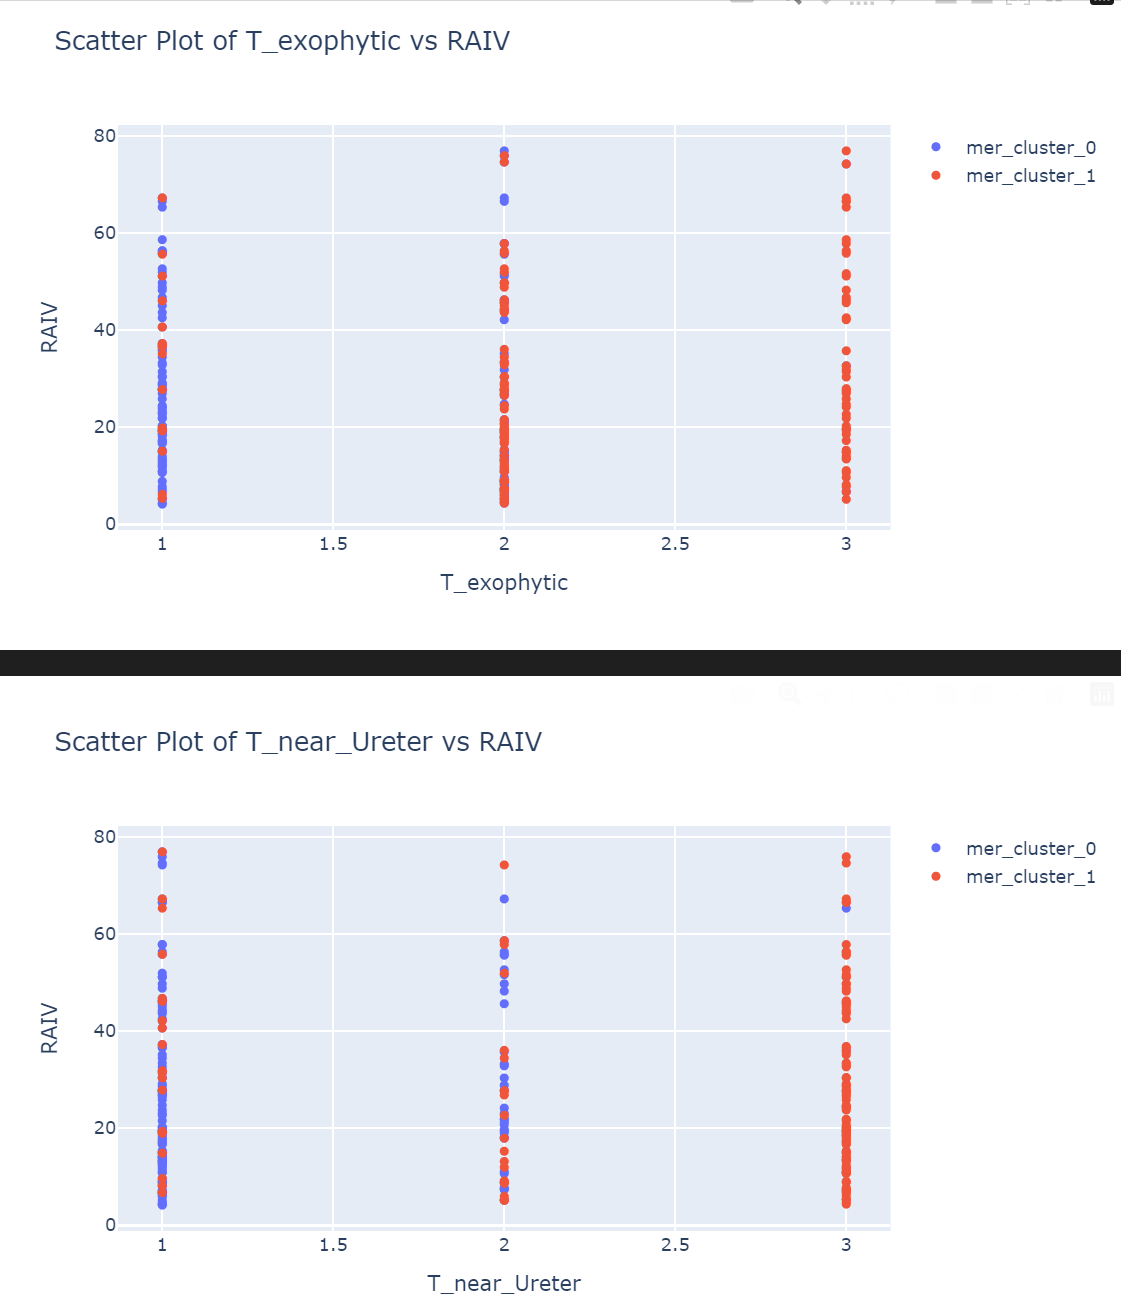

In [90]:
from IPython.display import Image

Image(filename='../data/v2_1.png')

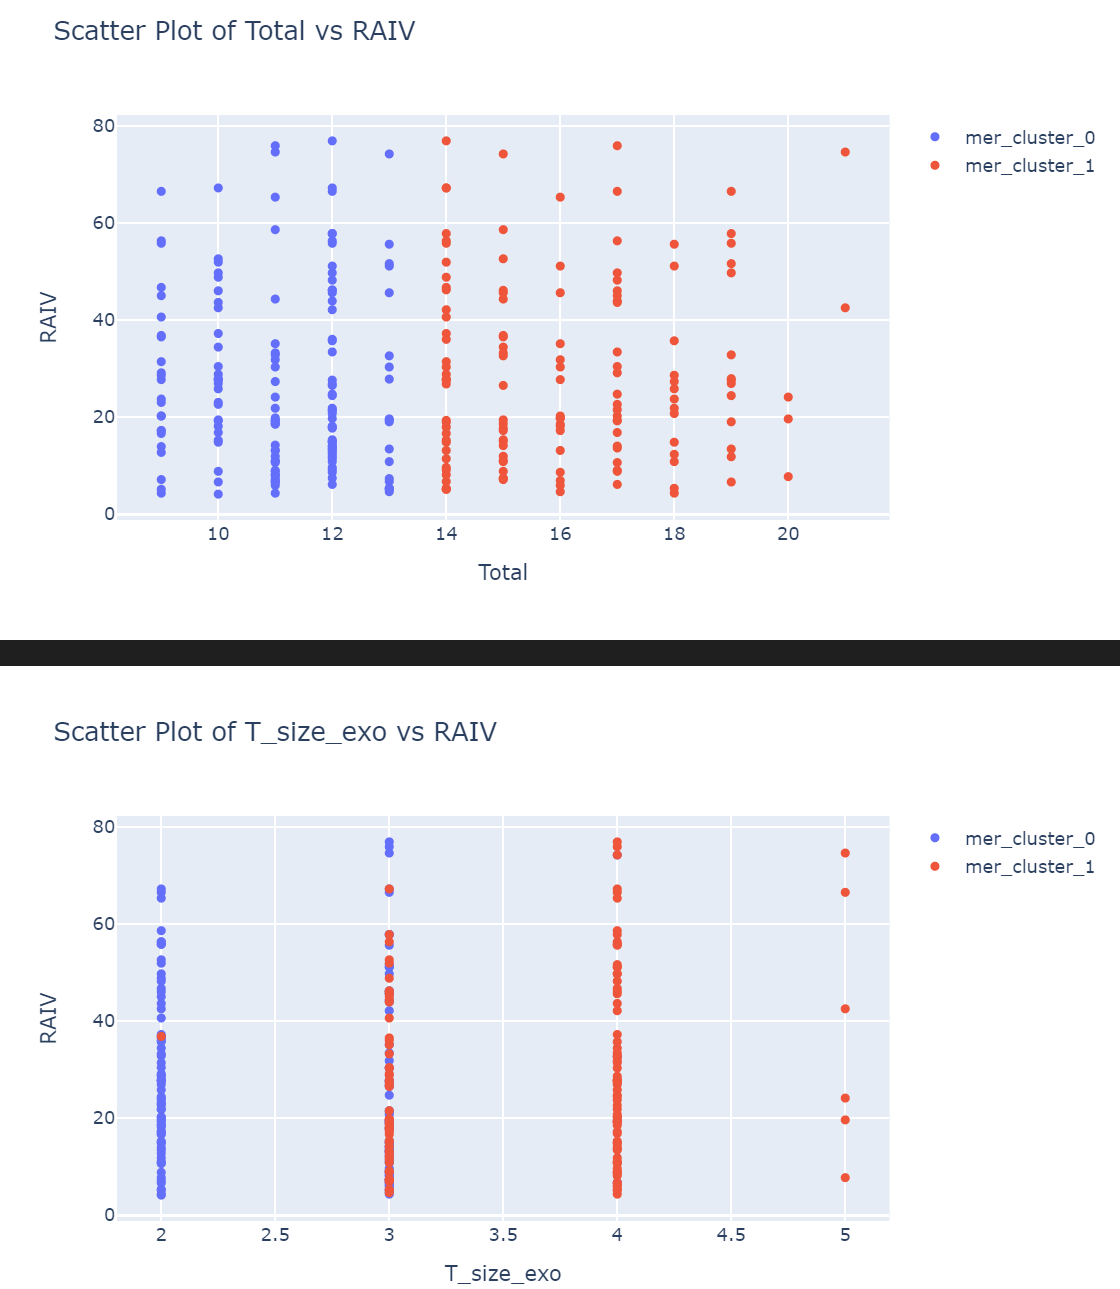

In [91]:
Image(filename='../data/v2_2.png')

## 데이터비율
이상치를 제거하지 않은 데이터 : 군집0 > 군집1 (158:138)